In [ ]:
pip install git+https://github.com/stevenpawley/Pyspatialml

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# Import used packages
import geopandas as gpd  # used to read the shapfile
import rasterio as rio   # used to read the raster (.tif) files
from rasterio.plot import show # used to make plots using rasterio
import matplotlib.pyplot as plt #to make plots using matplotlib
import seaborn as sns
import os
import pandas as pd

### Adding station locations

In [6]:
#reading station points
points = gpd.read_file('/content/drive/MyDrive/DownloadTest/stations.shp')

In [7]:
points

,ID,NAME,UTMX,UTMY,geometry
0,1,Silk Board,784605,1429452,POINT (784605.000 1429452.000)
1,2,BTM Layout,781598,1428998,POINT (781598.000 1428998.000)
2,3,Jayanagar 5th Block,780485,1429813,POINT (780485.000 1429813.000)
3,4,Hombegowda Nagar,781029,1431762,POINT (781029.000 1431762.000)
4,5,RVCE-Mailasandra,771534,1429772,POINT (771534.000 1429772.000)
5,6,Bapuji Nagar,775552,1433187,POINT (775552.000 1433187.000)
6,7,City Railway Station,778380,1435847,POINT (778380.000 1435847.000)
7,8,Sanegurava Halli,775874,1437443,POINT (775874.000 1437443.000)
8,9,Shivapura_Peenya,772024,1441202,POINT (772024.000 1441202.000)
9,10,Peenya,770511,1441451,POINT (770511.000 1441451.000)


### Adding raster files

In [8]:
# Define a function to extract raster values for a given point from a TIFF file
def extract_raster_values(point, raster_file):
    longitude = point['geometry'].x
    latitude = point['geometry'].y
    with rio.open(raster_file) as src:
        row, col = src.index(longitude, latitude)
        value = src.read(1)[row, col]  # Assuming single band raster
    return value

In [9]:
#Driving factors

points['NO2'] = None
points['Elevation'] = None
points['Rainfall'] = None
points['Population'] = None
points['VIIRS'] = None
points['LandUse'] = None
points['Temperature'] = None
points['WindSpeed'] = None

In [10]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
no2_raster_files = [f'/content/drive/MyDrive/DownloadTest/no2_{month}.tif' for month in months]
rainfall_raster_files = [f'/content/drive/MyDrive/DownloadTest/rainfall_{month}.tif' for month in months]
viirs_raster_files = [f'/content/drive/MyDrive/DownloadTest/viirs_{month}.tif' for month in months]
wind_raster_files = [f'/content/drive/MyDrive/DownloadTest/windspeed_{month}.tif' for month in months]
temp_raster_files = [f'/content/drive/MyDrive/DownloadTest/temp_{month}.tif' for month in months]

In [11]:
NO2_raster = rio.open('/content/drive/MyDrive/DownloadTest/no2Test2.tif')
NO2_arr = NO2_raster.read(1)

Elevation_raster = rio.open('/content/drive/MyDrive/DownloadTest/elevationTest1.tif')
Elevation_arr = Elevation_raster.read(1)

Rainfall_raster = rio.open('/content/drive/MyDrive/DownloadTest/rainTest1.tif')
Rainfall_arr = Rainfall_raster.read(1)

Pop_raster = rio.open('/content/drive/MyDrive/DownloadTest/populationTest1.tif')
Pop_arr = Pop_raster.read(1)

Landuse_raster = rio.open('/content/drive/MyDrive/DownloadTest/categoricalUse.tif')
Landuse_arr = Landuse_raster.read(1)

In [12]:
#Extracting the raster values to the points shapefile
count=0

for index,row in points.iterrows(): #iterate over the points in the shapefile
    longitude=row['geometry'].x #get the longitude of the point
    latitude=row['geometry'].y  #get the latitude of the point

    rowIndex, colIndex = NO2_raster.index(longitude,latitude) # the corresponding pixel to the point (longitude,latitude)

    # Extract the raster values at the point location
    points['NO2'].loc[index] = NO2_arr[rowIndex, colIndex]
    points['Elevation'].loc[index] = Elevation_arr[rowIndex, colIndex]
    points['Population'].loc[index] = Pop_arr[rowIndex, colIndex]
    points['Rainfall'].loc[index] = Rainfall_arr[rowIndex, colIndex]
    points['LandUse'].loc[index] = Landuse_arr[rowIndex, colIndex]
    #points['VIIRS'].loc[index] = Rainfall_arr[rowIndex, colIndex]

points


<ipython-input-12-5231535a1c2d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['NO2'].loc[index] = NO2_arr[rowIndex, colIndex]
<ipython-input-12-5231535a1c2d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Elevation'].loc[index] = Elevation_arr[rowIndex, colIndex]
<ipython-input-12-5231535a1c2d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Population'].loc[index] = Pop_arr[rowIndex, colIndex]
<ipython-

,ID,NAME,UTMX,UTMY,geometry,NO2,Elevation,Rainfall,Population,VIIRS,LandUse,Temperature,WindSpeed
0,1,Silk Board,784605,1429452,POINT (784605.000 1429452.000),0.000094,899,0.096829,311.084717,None,14,None,None
1,2,BTM Layout,781598,1428998,POINT (781598.000 1428998.000),0.000097,918,0.105698,311.084717,None,14,None,None
2,3,Jayanagar 5th Block,780485,1429813,POINT (780485.000 1429813.000),0.000097,918,0.105698,311.084717,None,14,None,None
3,4,Hombegowda Nagar,781029,1431762,POINT (781029.000 1431762.000),0.000101,911,0.105698,4442.861328,None,14,None,None
4,5,RVCE-Mailasandra,771534,1429772,POINT (771534.000 1429772.000),0.000091,813,0.105698,311.084686,None,13,None,None
5,6,Bapuji Nagar,775552,1433187,POINT (775552.000 1433187.000),0.0001,844,0.105698,5448.823242,None,14,None,None
6,7,City Railway Station,778380,1435847,POINT (778380.000 1435847.000),0.000103,889,0.105698,9186.900391,None,15,None,None
7,8,Sanegurava Halli,775874,1437443,POINT (775874.000 1437443.000),0.0001,897,0.105698,9186.283203,None,14,None,None
8,9,Shivapura_Peenya,772024,1441202,POINT (772024.000 1441202.000),0.000092,906,0.10142,9185.048828,None,24,None,None
9,10,Peenya,770511,1441451,POINT (770511.000 1441451.000),0.000088,876,0.1071,9185.049805,None,0,None,None


In [13]:
new_rows = []

for _, point in points.iterrows():
    for month, no2_file, rainfall_file, viirs_file, temp_file, wind_file in zip(months, no2_raster_files, rainfall_raster_files, viirs_raster_files, temp_raster_files, wind_raster_files):
        no2_value = extract_raster_values(point, no2_file)
        rainfall_value = extract_raster_values(point, rainfall_file)
        viirs_value = extract_raster_values(point, viirs_file)
        temp_value = extract_raster_values(point, temp_file)
        wind_value = extract_raster_values(point, wind_file)
        new_row = {
            'geometry': point['geometry'],
            'NAME': point['NAME'],
            'NO2': no2_value,
            'Elevation': point['Elevation'],
            'Rainfall': rainfall_value,
            'Population': point['Population'],
            'VIIRS':viirs_value,
            'LandUse': point['LandUse'],
            'Temperature':temp_value,
            'WindSpeed':wind_value,
        }
        new_rows.append(new_row)

new_points = gpd.GeoDataFrame(new_rows, crs=points.crs)
new_points

,geometry,NAME,NO2,Elevation,Rainfall,Population,VIIRS,LandUse,Temperature,WindSpeed
0,POINT (784605.000 1429452.000),Silk Board,0.000109,899,0.029407,311.084717,72.517502,14,283.0,160.0
1,POINT (784605.000 1429452.000),Silk Board,0.000112,899,0.006970,311.084717,65.619995,14,322.0,150.0
2,POINT (784605.000 1429452.000),Silk Board,0.000130,899,0.002326,311.084717,65.463127,14,356.0,170.0
3,POINT (784605.000 1429452.000),Silk Board,0.000118,899,0.062593,311.084717,60.801876,14,357.0,210.0
4,POINT (784605.000 1429452.000),Silk Board,0.000126,899,0.360507,311.084717,52.906250,14,347.0,190.0
...,...,...,...,...,...,...,...,...,...,...
151,POINT (790951.000 1431495.000),BWSSB Kadabesanahalli,0.000060,884,0.147316,199.990570,19.211876,0,287.0,290.0
152,POINT (790951.000 1431495.000),BWSSB Kadabesanahalli,0.000069,884,0.156623,199.990570,20.636875,0,294.0,190.0
153,POINT (790951.000 1431495.000),BWSSB Kadabesanahalli,0.000069,884,0.139792,199.990570,20.538124,0,290.0,130.0
154,POINT (790951.000 1431495.000),BWSSB Kadabesanahalli,0.000063,884,0.009620,199.990570,23.463125,0,288.0,150.0


In [14]:
new_points = pd.get_dummies(new_points, columns = ['LandUse'])
new_points

,geometry,NAME,NO2,Elevation,Rainfall,Population,VIIRS,Temperature,WindSpeed,LandUse_0,LandUse_3,LandUse_13,LandUse_14,LandUse_15,LandUse_24
0,POINT (784605.000 1429452.000),Silk Board,0.000109,899,0.029407,311.084717,72.517502,283.0,160.0,False,False,False,True,False,False
1,POINT (784605.000 1429452.000),Silk Board,0.000112,899,0.006970,311.084717,65.619995,322.0,150.0,False,False,False,True,False,False
2,POINT (784605.000 1429452.000),Silk Board,0.000130,899,0.002326,311.084717,65.463127,356.0,170.0,False,False,False,True,False,False
3,POINT (784605.000 1429452.000),Silk Board,0.000118,899,0.062593,311.084717,60.801876,357.0,210.0,False,False,False,True,False,False
4,POINT (784605.000 1429452.000),Silk Board,0.000126,899,0.360507,311.084717,52.906250,347.0,190.0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,POINT (790951.000 1431495.000),BWSSB Kadabesanahalli,0.000060,884,0.147316,199.990570,19.211876,287.0,290.0,True,False,False,False,False,False
152,POINT (790951.000 1431495.000),BWSSB Kadabesanahalli,0.000069,884,0.156623,199.990570,20.636875,294.0,190.0,True,False,False,False,False,False
153,POINT (790951.000 1431495.000),BWSSB Kadabesanahalli,0.000069,884,0.139792,199.990570,20.538124,290.0,130.0,True,False,False,False,False,False
154,POINT (790951.000 1431495.000),BWSSB Kadabesanahalli,0.000063,884,0.009620,199.990570,23.463125,288.0,150.0,True,False,False,False,False,False


In [15]:
csv_filename = 'new_points.csv'
new_points.to_csv(csv_filename, index=False)

## Dataset preperation

## Adding ground data

In [18]:
df=pd.read_csv("/content/drive/MyDrive/DownloadTest/with_ground(in).csv", encoding = 'unicode_escape')
df

,geometry,NAME,NO2 (mol/m^2),Elevation,Rainfall,Population,VIIRS,LandUse_0,LandUse_3,LandUse_13,LandUse_14,LandUse_15,LandUse_24,Temperature,WindSpeed,Monthly_avg_ground_data (µg/m³),Month
0,POINT (784605 1429452),Silk Board,0.000109,899,0.029407,311.08472,72.517500,False,False,False,True,False,False,283,160,35.099355,Jan
1,POINT (784605 1429452),Silk Board,0.000112,899,0.006970,311.08472,65.619995,False,False,False,True,False,False,322,150,33.109286,Feb
2,POINT (784605 1429452),Silk Board,0.000130,899,0.002326,311.08472,65.463130,False,False,False,True,False,False,356,170,46.137419,March
3,POINT (784605 1429452),Silk Board,0.000118,899,0.062593,311.08472,60.801876,False,False,False,True,False,False,357,210,49.319667,April
4,POINT (784605 1429452),Silk Board,0.000126,899,0.360507,311.08472,52.906250,False,False,False,True,False,False,347,190,66.451935,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,POINT (790951 1431495),BWSSB Kadabesanahalli,0.000060,884,0.147316,199.99057,19.211876,True,False,False,False,False,False,287,290,24.876296,Aug
152,POINT (790951 1431495),BWSSB Kadabesanahalli,0.000069,884,0.156623,199.99057,20.636875,True,False,False,False,False,False,294,190,21.445000,Sept
153,POINT (790951 1431495),BWSSB Kadabesanahalli,0.000069,884,0.139792,199.99057,20.538124,True,False,False,False,False,False,290,130,37.462414,Oct
154,POINT (790951 1431495),BWSSB Kadabesanahalli,0.000063,884,0.009620,199.99057,23.463125,True,False,False,False,False,False,288,150,39.107333,Nov


In [19]:
# df = points

In [20]:
df.columns.tolist()

['geometry',
 'NAME',
 'NO2 (mol/m^2)',
 'Elevation',
 'Rainfall',
 'Population',
 'VIIRS',
 'LandUse_0',
 'LandUse_3',
 'LandUse_13',
 'LandUse_14',
 'LandUse_15',
 'LandUse_24',
 'Temperature',
 'WindSpeed',
 'Monthly_avg_ground_data (µg/m³)',
 'Month']

## EDA and Preprocessing

In [21]:
df = df.dropna()

In [22]:
print(df.isnull().sum())

geometry                           0
NAME                               0
NO2 (mol/m^2)                      0
Elevation                          0
Rainfall                           0
Population                         0
VIIRS                              0
LandUse_0                          0
LandUse_3                          0
LandUse_13                         0
LandUse_14                         0
LandUse_15                         0
LandUse_24                         0
Temperature                        0
WindSpeed                          0
Monthly_avg_ground_data (µg/m³)    0
Month                              0
dtype: int64


In [23]:
df

,geometry,NAME,NO2 (mol/m^2),Elevation,Rainfall,Population,VIIRS,LandUse_0,LandUse_3,LandUse_13,LandUse_14,LandUse_15,LandUse_24,Temperature,WindSpeed,Monthly_avg_ground_data (µg/m³),Month
0,POINT (784605 1429452),Silk Board,0.000109,899,0.029407,311.08472,72.517500,False,False,False,True,False,False,283,160,35.099355,Jan
1,POINT (784605 1429452),Silk Board,0.000112,899,0.006970,311.08472,65.619995,False,False,False,True,False,False,322,150,33.109286,Feb
2,POINT (784605 1429452),Silk Board,0.000130,899,0.002326,311.08472,65.463130,False,False,False,True,False,False,356,170,46.137419,March
3,POINT (784605 1429452),Silk Board,0.000118,899,0.062593,311.08472,60.801876,False,False,False,True,False,False,357,210,49.319667,April
4,POINT (784605 1429452),Silk Board,0.000126,899,0.360507,311.08472,52.906250,False,False,False,True,False,False,347,190,66.451935,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,POINT (790951 1431495),BWSSB Kadabesanahalli,0.000060,884,0.147316,199.99057,19.211876,True,False,False,False,False,False,287,290,24.876296,Aug
152,POINT (790951 1431495),BWSSB Kadabesanahalli,0.000069,884,0.156623,199.99057,20.636875,True,False,False,False,False,False,294,190,21.445000,Sept
153,POINT (790951 1431495),BWSSB Kadabesanahalli,0.000069,884,0.139792,199.99057,20.538124,True,False,False,False,False,False,290,130,37.462414,Oct
154,POINT (790951 1431495),BWSSB Kadabesanahalli,0.000063,884,0.009620,199.99057,23.463125,True,False,False,False,False,False,288,150,39.107333,Nov


<Axes: >

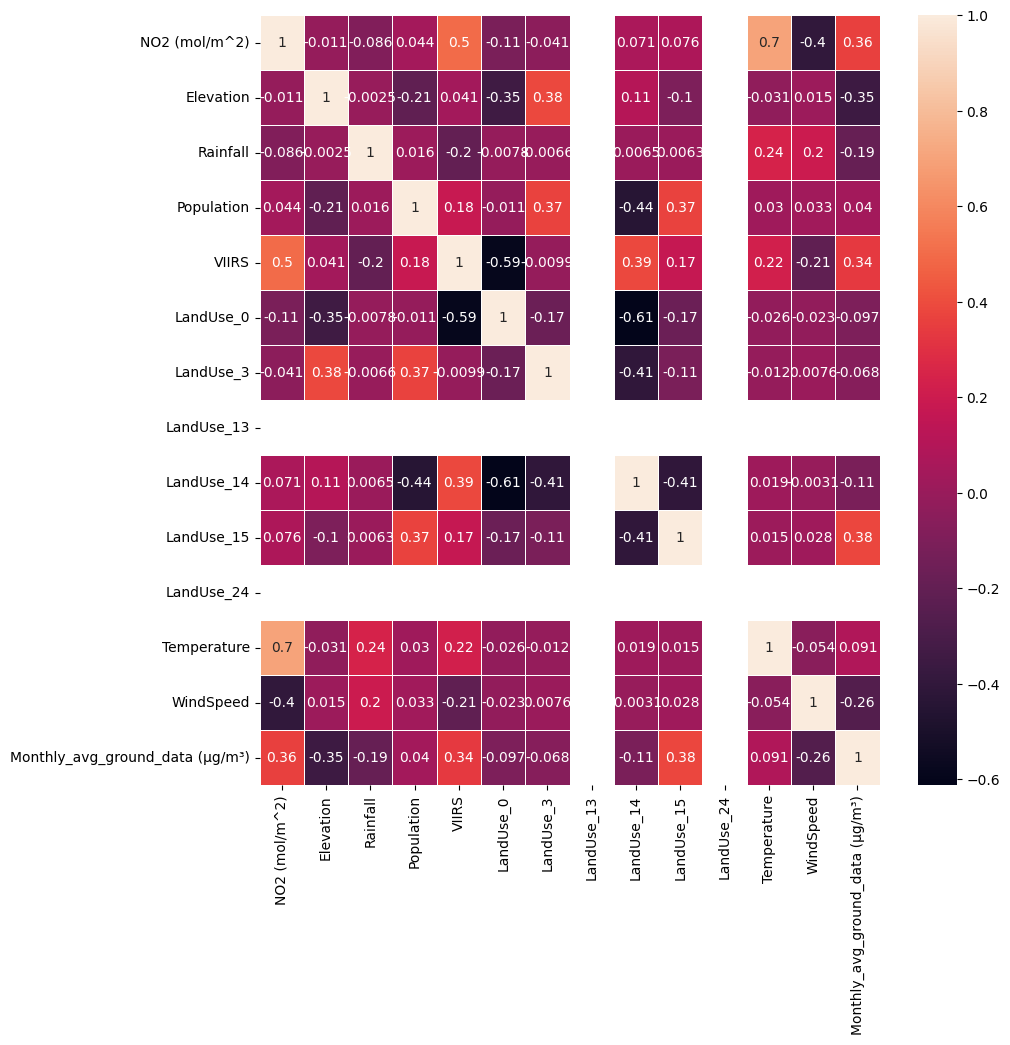

In [24]:
# show the correlation matric for the dataset
df_tmp = df.drop(columns = ['geometry', 'NAME','Month'], axis = 1)
corrMatrix = df_tmp.corr()
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

<Figure size 2000x2000 with 0 Axes>

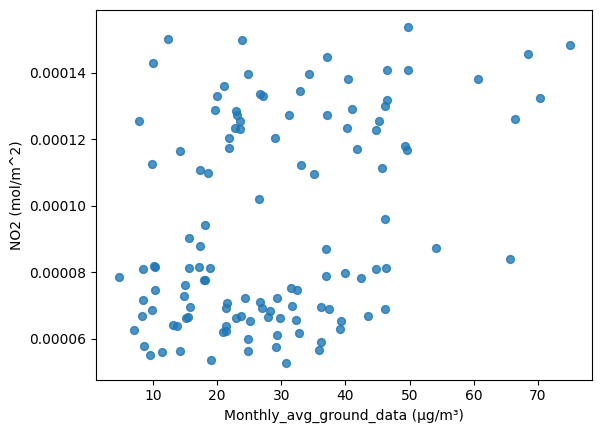

<Figure size 2000x2000 with 0 Axes>

In [25]:
# @title NO2 vs Elevation

# from matplotlib import pyplot as plt

# df.plot(kind='scatter', x='Monthly_avg_ground_data (µg/m³)', y='NO2 (mol/m^2)', s=32, alpha=.8)

# plt.figure(figsize=(20, 20))

### VIIRS vs Ground Data

<Figure size 2000x2000 with 0 Axes>

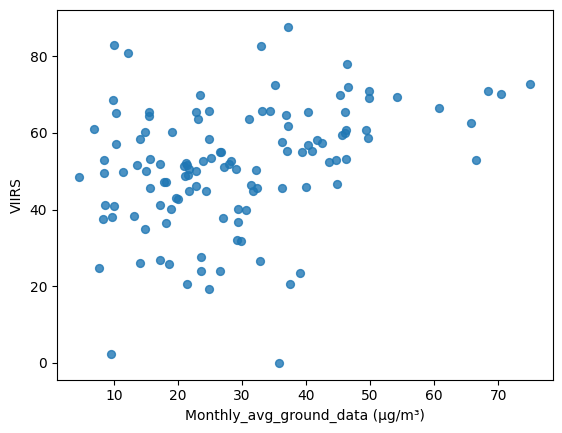

<Figure size 2000x2000 with 0 Axes>

In [26]:
# df.plot(kind='scatter', x='Monthly_avg_ground_data (µg/m³)', y='VIIRS', s=32, alpha=.8)

# plt.figure(figsize=(20, 20))

## Training Models

#### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np


# Reshape the input data to be 2D arrays
y = df['Monthly_avg_ground_data (µg/m³)']
x = df.drop(columns=['Monthly_avg_ground_data (µg/m³)',"NAME", "geometry", "Month"])


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state = 31)

#defining function for evaluation
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Gradient Boosting Regressor

In [37]:
#Gradient Boosting regressor with hyperparameter tuning using GridSearch

np.random.seed(55)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 8, 12, 16]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gbr, param_grid, cv=2)

# Train the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(x_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):" , rmse)

R^2 Score: 0.5755577318752955
Mean Absolute Error (MAE): 8.322555110754957
Mean Squared Error (MSE): 98.78270167533152
Mean Absolute Percentage Error (MAPE): 39.114751342455904
Root Mean Squared Error (RMSE): 9.938948720832174


#### Random Forest Regressor

In [41]:
#Random forest with hyperparameter tuning using GridSearch

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

np.random.seed(45)


# Define the parameter grid
param_grid = {
    'n_estimators': [15, 25, 50, 75, 100],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10, 12],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(rfr, param_grid, cv=2)

# Train the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(x_test)


# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):" , rmse)

R^2 Score: 0.48329370957968887
Mean Absolute Error (MAE): 9.112590118171864
Mean Squared Error (MSE): 120.25579725099472
Mean Absolute Percentage Error (MAPE): 43.74891919460723
Root Mean Squared Error (RMSE): 10.96612042843752


## Comparision with Local Sensing Data